In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [9]:
df = pd.read_csv('./datasets/WineQT.csv')
df.head()
# df.drop(columns = ['quality','Id'],inplace=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

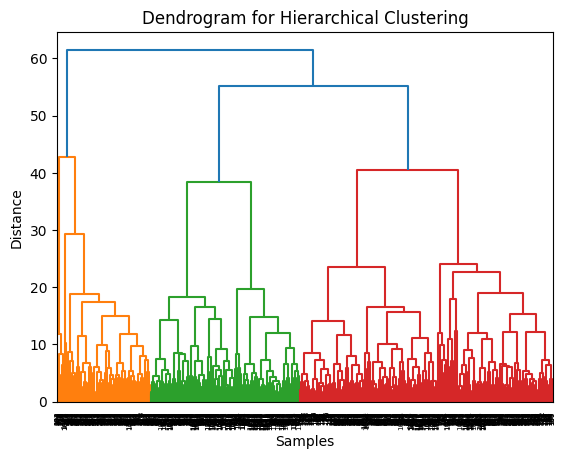

In [14]:
sc.dendrogram(sc.linkage(X_scaled,method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [31]:
#optimal clusters = 3
for i in range(2,20):
    model = AgglomerativeClustering(n_clusters=i)
    labels = model.fit_predict(X_scaled)
    df['clusters'] = labels
    sil = silhouette_score(X_scaled,labels)
    d = davies_bouldin_score(X_scaled,labels)
    print(f" n = {i},Silhouette Score = {sil}, davies_bouldin_score = {d}")

 n = 2,Silhouette Score = 0.2007984938228457, davies_bouldin_score = 1.9459184112642278
 n = 3,Silhouette Score = 0.14374217314565277, davies_bouldin_score = 2.024912897201879
 n = 4,Silhouette Score = 0.150757964808571, davies_bouldin_score = 1.68353025456332
 n = 5,Silhouette Score = 0.12572454254363388, davies_bouldin_score = 1.7582266997619314
 n = 6,Silhouette Score = 0.12719575314277742, davies_bouldin_score = 1.7533162913203795
 n = 7,Silhouette Score = 0.13300903838727812, davies_bouldin_score = 1.5886806067067774
 n = 8,Silhouette Score = 0.13751122795920814, davies_bouldin_score = 1.5999589834349317
 n = 9,Silhouette Score = 0.11271870295738803, davies_bouldin_score = 1.6721352346923894
 n = 10,Silhouette Score = 0.11783900269547042, davies_bouldin_score = 1.712286457176976
 n = 11,Silhouette Score = 0.11721524529311858, davies_bouldin_score = 1.6885399692323444
 n = 12,Silhouette Score = 0.10988922990181896, davies_bouldin_score = 1.7787474819294378
 n = 13,Silhouette Score 

In [27]:
sil = silhouette_score(X_scaled,labels)
sil

np.float64(0.150757964808571)